Objetivo:   
Escolher um base de dados e computar uma regressão linear simples, encontrando os seguintes parâmetros:
1. Coeficientes: Beta0 e Beta1.
2. Soma do Erro Médio Quadrado . 
3. Coeficiente de Determinação.

In [216]:
# importando as bibliotecas necessárias
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#lendo o dataset, neste dataset é relatado os custos médicos por pessoa 
df = pd.read_csv("insurance.csv", header=0)

#Tratamento para retirar alguns outliers que se destaquem muito da média
Outliers = 1.33*df.charges.mean()

#Para melhorar o estudo da regressão diminui-se o dataset para estudar apenas mulheres, e que não são fumantes, também é retirado os outliers conforme explicado anteriormente
dfFiltered = df[(df.sex=="female")&(df.smoker=="no")&(df.charges < Outliers)]

#Printando a quantidade de dados ainda restante, para garantir que não houve uma perda muito grande graças as filtranges anteriores
print(dfFiltered.shape)

#Retirando as colunas que interessam ao estudo, vamos fazer uma regressão para encontrar a relação entre custos e a idade
age_X = dfFiltered.loc[:,"age"].values
charges_Y = dfFiltered.loc[:,"charges"].values


#Separando entre dados de teste e dados de treino
age_X_train, age_X_test, charges_Y_train, charges_Y_test = train_test_split(age_X, charges_Y)

# Cria um objeto de regressão linear
regr = linear_model.LinearRegression()

#Muda o formato dos dados X para ser aceito pela biblioteca:
age_X_train_reshaped = age_X_train.reshape((-1,1))
age_X_test_reshaped = age_X_test.reshape((-1,1))


#Treina o modelo linear com os dados de treino
regr.fit(age_X_train_reshaped, charges_Y_train)

#Faz uma predição com os dados de teste
charges_y_pred = regr.predict(age_X_test_reshaped)

# Os coeficientes
print("Valor de beta 1: \n", regr.coef_[0])
print("valor de beta 0:\n", regr.intercept_)

# Apresenta o erro quadrático médio
print("Erro quadrático médio: ", mean_squared_error(charges_Y_test, charges_y_pred))
# Apresenta o coeficiente determinação
print("Coeficiente de determinação: ", r2_score(charges_Y_test, charges_y_pred))

(507, 7)
Valor de beta 1: 
 257.83694206024404
valor de beta 0:
 -2620.0437809499936
Erro quadrático médio:  1569065.9075588356
Coeficiente de determinação:  0.8946576906205186


Agora plotando os gráficos:

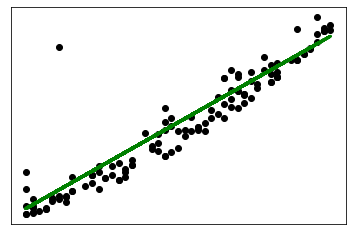

In [217]:
# Plota os pontos de testes e a reta de predição obtida na aplicação de modelagem
plt.scatter(age_X_test, charges_Y_test,  color='black')
plt.plot(age_X_test, charges_y_pred, color='green', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()